Data Cleaning

Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

Load Dataset

In [8]:
df = pd.read_csv("AB_NYC_2019.csv")  
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Data Integrity Check

In [9]:
# 3. Check basic info
df.info()

# 4. Check for inconsistent column names
df.columns

# 5. Summary statistics
df.describe(include='all')

# Optional: Check for strange or unexpected values
for col in df.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Missing Data Handling

In [10]:
# 6. Check missing values
df.isnull().sum()

# 7. Handle missing data
# Option 1: Drop rows
# df.dropna(inplace=True)

# Option 2: Fill with mean/median/mode
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# For categorical columns
# df['category_column'].fillna(df['category_column'].mode()[0], inplace=True)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Duplicate Removal

In [11]:
# 8. Check for duplicate rows
df.duplicated().sum()

# 9. Remove duplicates
df.drop_duplicates(inplace=True)


Standardization

In [14]:
# 10. Standardize text fields
from sklearn.preprocessing import StandardScaler

# Select numeric columns to standardize
cols_to_standardize = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']

# Initialize scaler
scaler = StandardScaler()

# Apply standardization
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


Outlier Detection

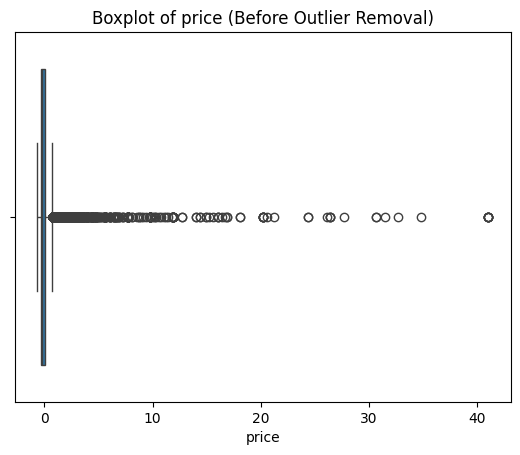

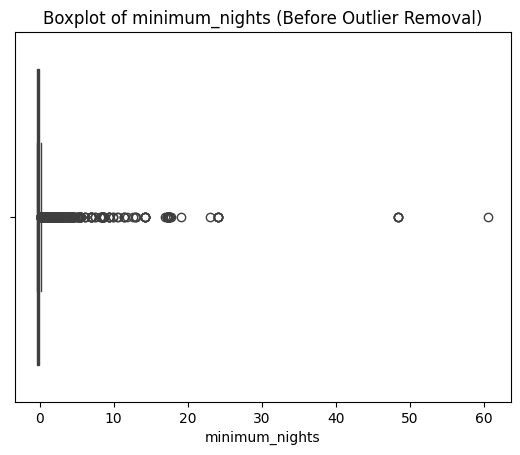

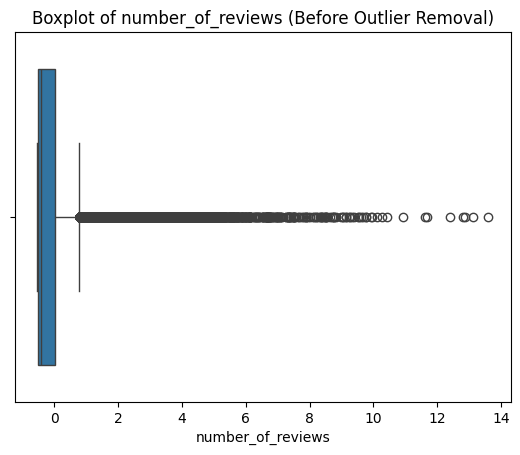

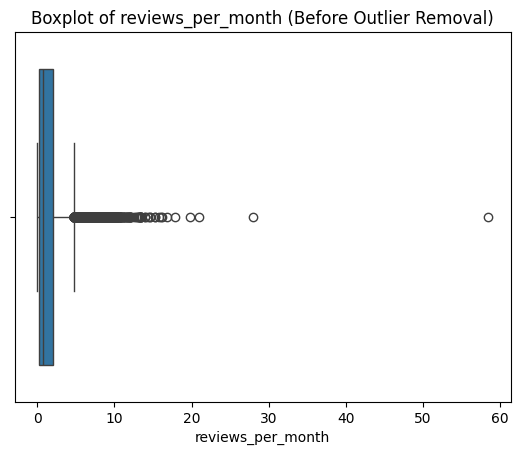

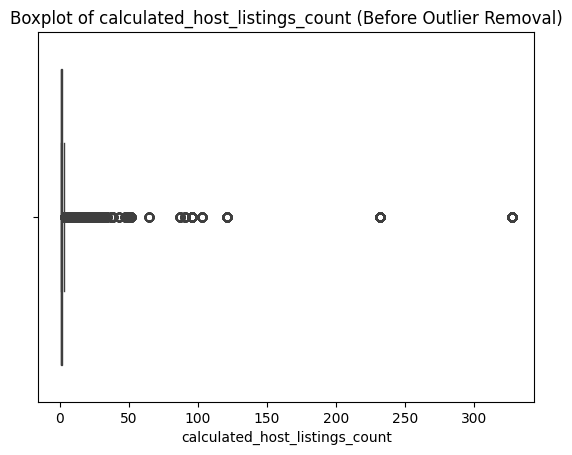

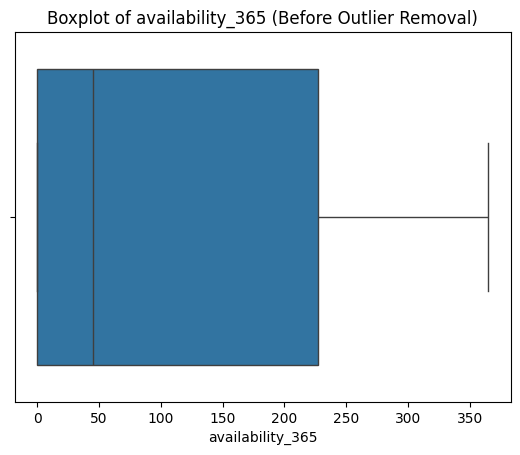

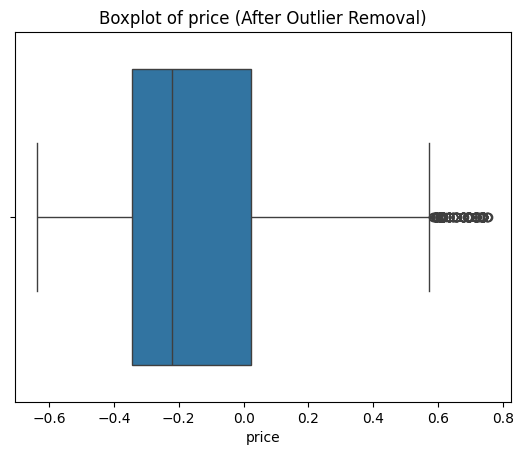

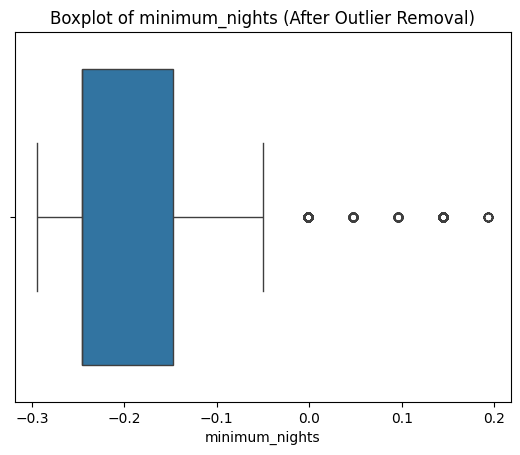

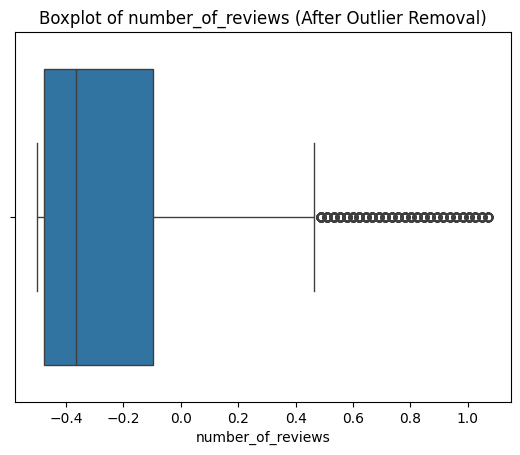

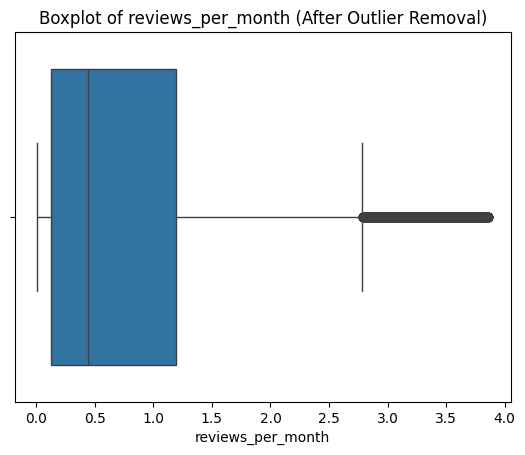

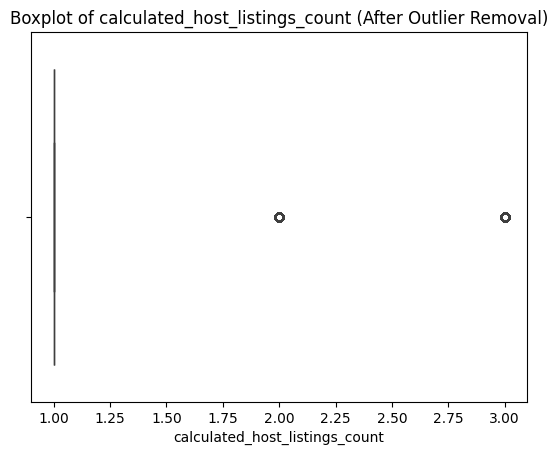

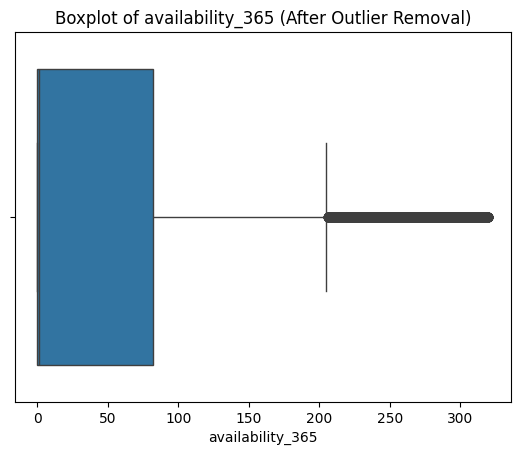

In [17]:
# 13. Boxplot for outliers


# List of numeric columns you want to clean
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 
                'availability_365']

# Optional: Visualize boxplots before removing outliers
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Outlier Removal)")
    plt.show()

# Outlier Removal using IQR for each column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Optional: Visualize boxplots after outlier removal
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (After Outlier Removal)")
    plt.show()
